# **🎯 Objectif**

* Ce projet a pour but de prédire l'adhésion d'un individu à un nouveau produit bancaire. 

* Il s'agit d'une  problématique **d'apprentissage supervisé** s'appuyant sur des **modèles de classifications** . En effet, il y a une variable cible de type qualitative que l'on va chercher à prédire avec des données labélisées.

# 1. Documentation de la base de données 

## **1.1 Légende du dataset**

|NOM DE LA COLONNE |DESCRIPTION|
|-----------------|:------------|
**age**	                |age de l'individu |
**job**	                |job|
**marital**	            |marié ou non
**education**	          |niveau d'étude
**default**	            |le client a-il eu un défaut de paiement sur un crédit ?
**balance**	            |montant des encours détenus par le client
**loan** 	              |a un prêt ?
**contact** 	          |comment la personne a été contactée ?
**housing** 	          |a un prêt immobilier ?
**day**	                |jour du dernier contact de la campagne en cours
**month**	              |mois du dernier contact de la campagne en cours
**duration**	          |durée (en secondes) du dernier contact de la campagne en,cours
**campaign**	          |nombre de contacts effectués au cours de cette campagne et pour ce client (inclut le dernier contact)
**pdays**	              |nombre de jours qui se sont écoulés depuis que le client a été contacté pour la dernière fois lors d'une campagne précédente
**previous**	          |nombre de contacts effectués avant cette campagne et pour ce client
**poutcome**	          |résultat de la campagne marketing précédente
**deposit**	            |variable cible renseignant la souscription du contrat

## **1.2 Schéma explicatif du lien entre nos différentes variables :** 
* variables quantitatives (**en rouge**)
* variables qualitatives (**en vert**)

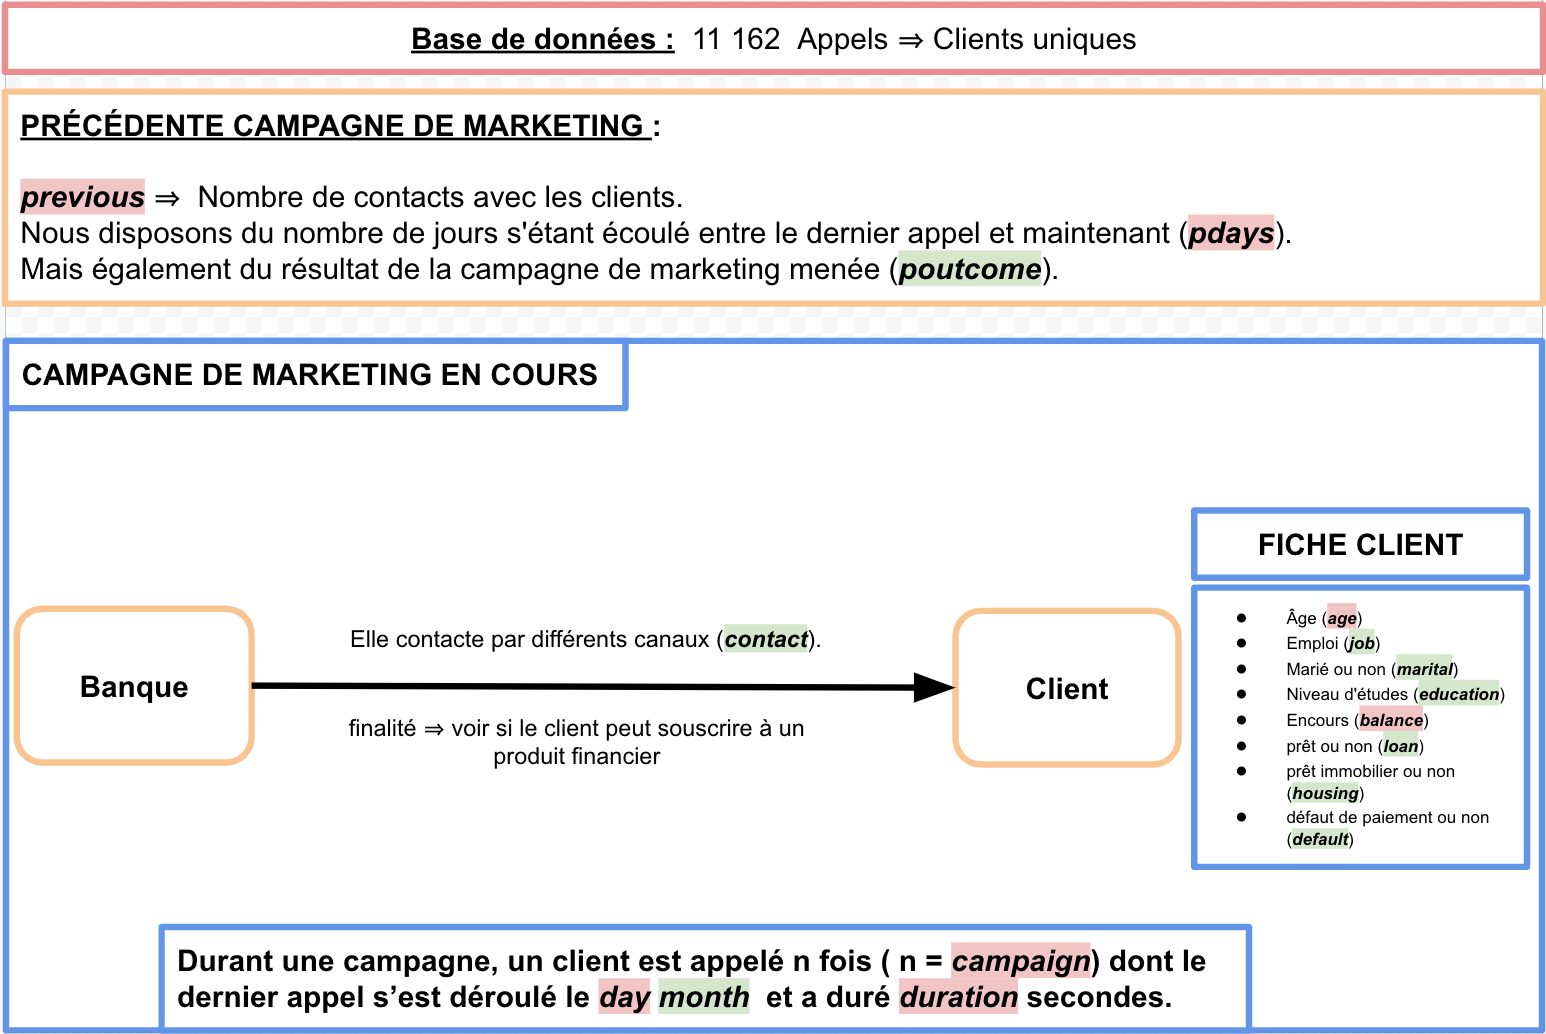

# 2. La base de données 

## **2.1 Importation des librairies** 

In [108]:

import pandas as pd
import numpy as np
from scipy.stats import norm
import time

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score , cross_validate , StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, plot_roc_curve

## **2.2 Importation de la base de données** 

In [109]:
data_url = "https://mc-snowflake.s3.eu-west-2.amazonaws.com/dataset/bank.csv"
df = pd.read_csv("bank.csv") # Chargement des données 

* **Affichage de notre dataset :**

In [110]:
# Premières lignes :
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [111]:
# Dernières lignes :
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [112]:
df.shape

(11162, 17)

## **2.3 Vérifications préliminaires** 

### Vérification que la colonne `deposit` (la target) est equilibrée

In [113]:
print("pourcentage d'éléments de chaque mode de la target")
np.round(df[['deposit']].value_counts(normalize=True)*100,2) 

pourcentage d'éléments de chaque mode de la target


deposit
no         52.62
yes        47.38
dtype: float64

❓ **POURQUOI ? :**

* Dans un ensemble de données de classification, le nombre de points de données représentant chaque classe peut être déséquilibré. 
* Ainsi, étant donné que les algorithmes ML apprennent par l'exemple, ils auront tendance à prédire mal la classe sous-représentée. D’où l'intérêt de veiller à ce que nos classes soient bien équilibrées (ce qui est le cas ici).

###  Vérification du type de nos différentes variables

In [114]:
df.dtypes 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

❓ **POURQUOI ? :**

* Les modèles, que nous seront amenés à utiliser durant la phase de modélisation, prennent en entrée seulement des données numériques. De ce fait, en contrôlant dès à présent le type de nos variables, cela nous permet de déjà réfléchir à d'éventuels prétraitements à réaliser sur nos différentes variables.

# 3. Analyse exploratoire des données (EDA) 

## **3.1 Analyse des données *quantitatives*** 



### Analyse univariée 

#### Statistiques descriptives

In [115]:
pd.set_option('precision', 2) # 2 chiffres après la virgule
df.describe() # 7 colonnes numériques

,age,balance,day,duration,campaign,pdays,previous
count,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00
mean,41.23,1528.54,15.66,371.99,2.51,51.33,0.83
std,11.91,3225.41,8.42,347.13,2.72,108.76,2.29
min,18.00,-6847.00,1.00,2.00,1.00,-1.00,0.00
25%,32.00,122.00,8.00,138.00,1.00,-1.00,0.00
50%,39.00,550.00,15.00,255.00,2.00,-1.00,0.00
75%,49.00,1708.00,22.00,496.00,3.00,20.75,1.00
max,95.00,81204.00,31.00,3881.00,63.00,854.00,58.00


👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

  *   **`age`** : L'âge moyen, des clients interrogés, est de **41** ans. **50%** des clients sont âgés entre **32** et **49** ans. 

  *   [**`balance`**](https://comptabilite.ooreka.fr/astuce/voir/544917/encours) : L'encours correspond à la somme détenue sur un compte bancaire par les clients interrogés. Ici, l'encours moyen s'élève à **1528,54**.
  Ce dernier est amené à fluctuer entre **-6847.00** (solde négatif) et **81204,00** (solde positif).
 
  *   **`day`** : Les clients interrogés sont, en moyenne, appelés en milieu de mois.
  *   **`duration`** : La durée moyenne d'un appel (en seconde), est de **371** secondes (soit environ **6** minutes). **75%** des appels n'excédent pas les **496** secondes (environ **8** minutes). 

  *   **`campaign`** : Le nombre median de contacts effectués au cours d'une  campagne est de **2**.

  *   **`pdays`** : Après la fin de la précédente campagne, les clients  sont généralement rappelés **21** (**75%** des clients) jours après le dernier échange avec la banque.

  *   **`previous`** : Plus de la moitié des individus contactés pour cette campagne sont de nouveaux clients.

  *  **`pdays`** : Il s'agit du nombre de jours écoulés depuis la précédente campagne. Cette variable nous intrigue avec la valeur -1. C'est sans doute une valeur pour les clients qui n'ont pas été contactés lors de la précédente campagne. On va donc vérifier que pour cette valeur, on a bien un **`previous`** à 0 si notre hypothèse est exacte.

In [116]:
verif_pdays = df.loc[df['pdays']==-1., 'previous']

print('pourcentage de personnes contactées uniquement lors de la campagne en cours :', np.round(len(verif_pdays)/len(df)*100,2), '%')
print("somme de la colonne 'previous' pour s'assurer qu'ils sont bien contactés uniquement lors de la campagne en cours :",verif_pdays.sum(axis=0))

pourcentage de personnes contactées uniquement lors de la campagne en cours : 74.57 %
somme de la colonne 'previous' pour s'assurer qu'ils sont bien contactés uniquement lors de la campagne en cours : 0


Dans le dataset, il y a donc environ 

- **75%** de personnes qui sont contactées pour une première fois lors de la campagne en cours.

- **25%** qui ont déjà été contactées auparavant.


#### Analyse de la distribution des variables quantitatives

In [117]:
df_numerics = df.select_dtypes(include=['int64'])

In [118]:
# Contrôle des valeurs NA
df_numerics.isna().sum(axis=0)

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

* La compréhension de la forme des données est une action cruciale. Cela aide à comprendre où se trouve le plus d'informations et à analyser les valeurs aberrantes dans une donnée. 

* En statistique, l'asymétrie (**skewness**) est un degré d'asymétrie observé dans une distribution de probabilité qui s'écarte de la distribution normale symétrique (courbe en cloche) dans un ensemble de données donné.

* Si les valeurs d'une variable quantitative souffrent d'asymétrie, alors cela entraine une violation des hypothèses des modèles statistiques et/ou réduit l'interprétation de la significativité de la variable.

![](https://www.researchgate.net/profile/Marco-Faria/publication/294890337/figure/fig5/AS:668873900716049@1536483373457/a-Negative-skewness-b-Normal-curve-c-Positive-skewness-Durkhure-and-Lodwal-2014.ppm)







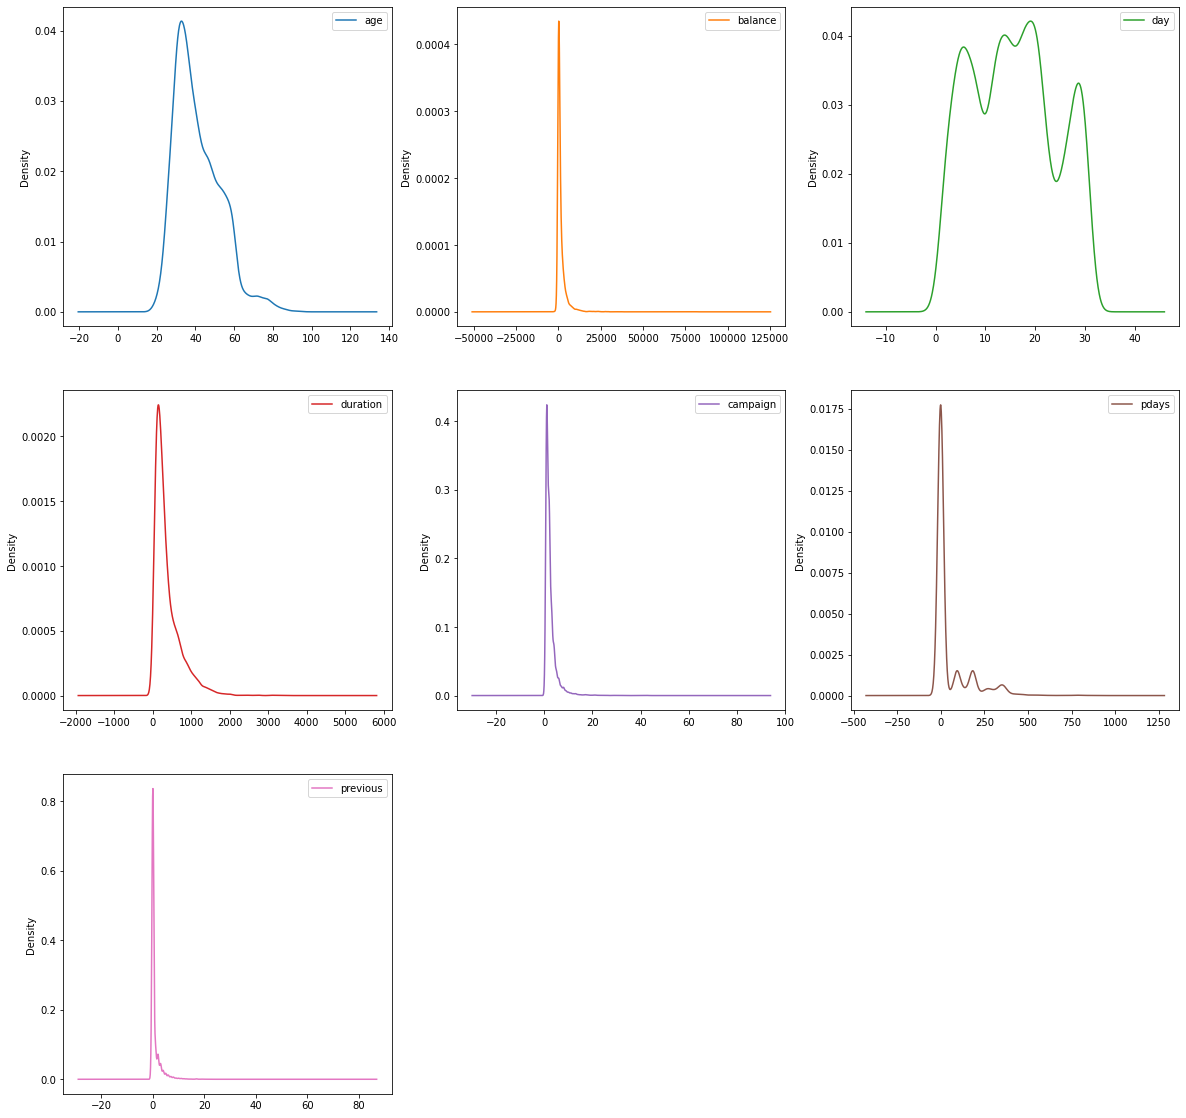

In [119]:
df_numerics.plot(kind= "kde", subplots = True, layout = (3,3),sharex = False,figsize = (20,20));

👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

* Toutes nos variables souffrent d'une asymétrie postive. 
Etant donné que l'asymétrie est mauvaise pour nos données et que de nombreux algorithmes d'apprentissage automatique préfèrent, ou fonctionnent mieux lorsque, les données numériques ont une distribution normale, il faudra veiller  à standardiser nos variables quantitatives lors de la phase de prétraitement.

#### Détections de valeurs aberrantes (outliers)

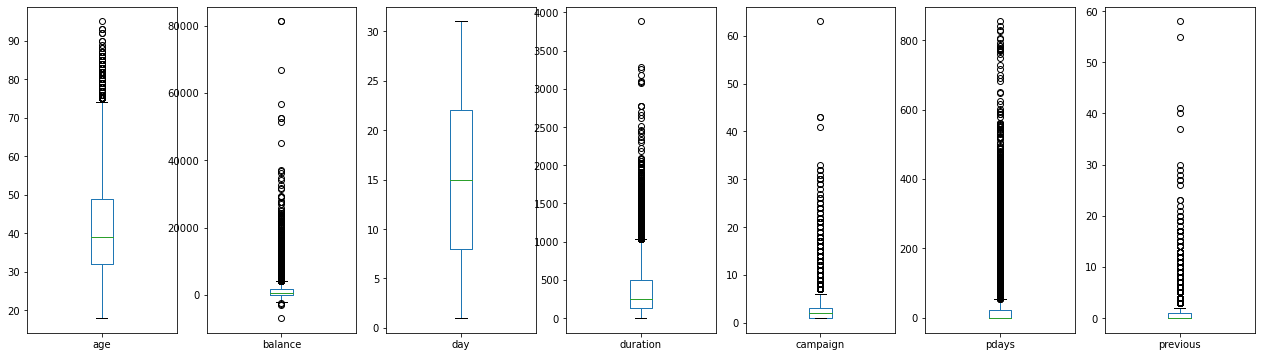

In [120]:
df_numerics.plot(kind= "box", subplots = True, layout = (1,7),sharex = False,figsize = (22,6));

👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

🚨 Avant de "supprimer" des valeurs aberrantes, il est important de comprendre ce que les données représentent dans la vie réelle. En effet, il peut s'agir d'une "opinion" marginale mais réaliste (d'un point de vu métier).

Parmi les bloxplots que nous avons obtenus, 2 ont attiré notre attention :

*   **`balance`** : L'encours correspond à la somme détenue sur un compte bancaire par les clients interrogés. Ici, le fait que l'on ait des outliers   (par exemple  -6847.00 (solde négatif) et 81204,00 (solde positif)) est rare mais normal d'un point de vue métier.
En effet, durant la campagne  marketing, la banque peut être amenée à contacter des personnes disposant d'un encours élevé (tant positif que négatif). 

*   **`previous`** : Il s'agit du nombre de contacts effectués avant cette campagne et pour ce client. Parmi les clients ayant participé à cette campagne, seulement 25% ont déjà été contactées auparavant. Cela peut donc expliquer ce fort contraste.

 

### Analyse multivariée

#### Analyse de la corrélation des variables quantitatives

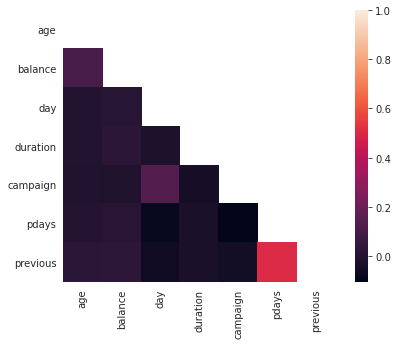

In [121]:
mask = np.zeros_like(df_numerics.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(df_numerics.corr(), mask=mask, vmax=1, square=True)

👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

* En regardant la matrice de corrélation, on se rend compte que la variable  **`pdays`** est corrélée avec la variable **`previous`**. 
* Autrement dit, plus le nombre de contacts effectués, avant la campagne et pour un client donnée,  est élevée, plus le nombre de jours qui se sont écoulés depuis que le client a été contacté pour la dernière fois lors d'une campagne précédente est élevé.


#### Matrice de diffusion

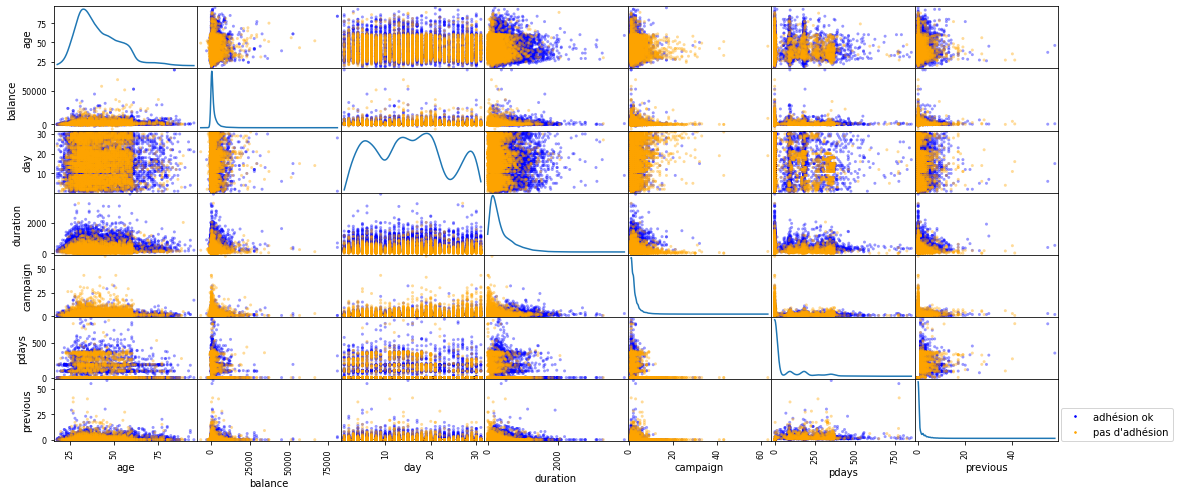

In [122]:
def fill_color(x):
    if x=='yes':
        return 'blue'
    else:
        return 'orange'
    
colors = df['deposit'].apply(fill_color)

scatter_matrix(df_numerics.iloc[:,:], figsize = (18, 8), diagonal = 'kde',c=colors, alpha=0.4)
colors=['blue','orange']
handles = [plt.plot([],[],color=colors[i], ls="", marker=".",markersize=np.sqrt(10))[0] for i in range(2)]
plt.legend(handles=handles, labels=['adhésion ok',"pas d'adhésion"], loc=(1.02,0));

👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

*  Relation entre **`age`** et **`duration`**:
  * Les personnes agées (>60 ans) qui sont contactées pour une durée supérieure à 500s(~ 8min) adhèrent au nouveau produit
  * Les plus jeunes (< 60 ans) adhèrent au nouveau produit après un échange plus long (>1000s ~ 16 min)

*  Relation entre **`pdays`** et **`duration`**:
  * Lorsqu'on contacte un individu dans les 400jrs(près d'1an) après la précédente campagne, on n'a pas besoin de mettre long avec la personne pour la convaincre de faire la souscription
  * Lorsqu'on contacte la personne moins d'1an après la précédente campagne, il y a plus de chance de faire adhérer la personne si l'échange dure un peu plus.

*  Relation entre **`pdays`** et **`age`**:
  * Les plus jeunes (< 60 ans) sont généralement convaincus d'adhérer au nouveau produit lorsqu'ils sont contactés près d'1 an après la précédente campagne.

*  Relation entre **`previous`** et **`duration`**:
  * Moins il y a eu de contacts avant la campagne en cours, plus la nécesité d'avoir un échange long lors du dernier contact est nécessaire afin que la personne puisse adhérer au nouveau produit.

*  Relation entre **`campaign`** et **`duration`**:
  * C'est le même constat qu'au point 4. Moins il y a eu de contacts pendant la campagne en cours, plus la nécesité d'avoir un échange long lors du dernier contact est nécessaire afin que la personne puisse adhérer au nouveau produit.

Ces observations mettent en exergue un profil de clients susceptibles d'adhérer au nouveau produit sur certaines conditions. ça ne nous permet pas de caractériser ceux où nous avons une densité plus importante de données (temps du dernier échange < 8 min, population jeune, client contacté uniquement lors de la campagne en cours).

#### Histogrammes

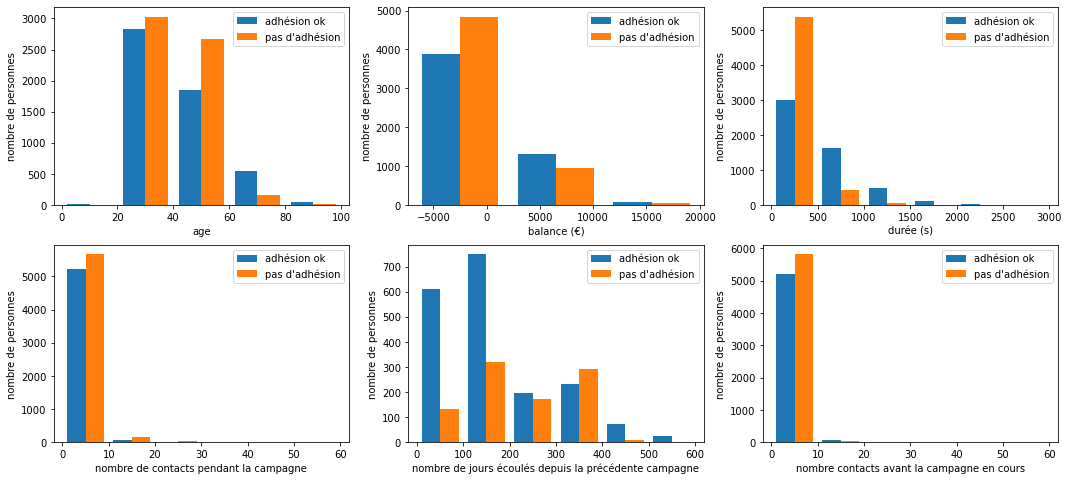

In [123]:
fig = plt.figure(figsize=(18,8))
# plt.suptitle('balance bancaire des personnes contactées')

# age
plt.subplot(231)
plt.hist([df.loc[df['deposit']=='yes','age'], df.loc[df['deposit']=='no','age']], bins = [0,20,40,60,80,100], 
         rwidth=0.8, density=False, label=['adhésion ok', "pas d'adhésion"])
plt.xlabel('age')
plt.ylabel('nombre de personnes')
plt.legend()

# balance
plt.subplot(232)
plt.hist([df.loc[df['deposit']=='yes','balance'], df.loc[df['deposit']=='no','balance']], bins = [-7000,2000,11000,20000], 
         rwidth=0.8, density=False, label=['adhésion ok', "pas d'adhésion"])
plt.xlabel('balance (€)')
plt.ylabel('nombre de personnes')
plt.legend()

# duration
plt.subplot(233)
plt.hist([df.loc[df['deposit']=='yes','duration'], df.loc[df['deposit']=='no','duration']], bins = [0,500,1000,1500,2000,2500,3000], 
         rwidth=0.8, density=False, label=['adhésion ok', "pas d'adhésion"])
plt.xlabel('durée (s)')
plt.ylabel('nombre de personnes')
plt.legend()

# campaign
plt.subplot(234)
plt.hist([df.loc[df['deposit']=='yes','campaign'], df.loc[df['deposit']=='no','campaign']], bins = [0,10,20,30,40,50,60], 
         rwidth=0.8, density=False, label=['adhésion ok', "pas d'adhésion"])
plt.xlabel('nombre de contacts pendant la campagne')
plt.ylabel('nombre de personnes')
plt.legend()

# pdays
plt.subplot(235)
plt.hist([df.loc[df['deposit']=='yes','pdays'], df.loc[df['deposit']=='no','pdays']], bins = [0,100,200,300,400,500,600], 
         rwidth=0.8, density=False, label=['adhésion ok', "pas d'adhésion"])
plt.xlabel('nombre de jours écoulés depuis la précédente campagne')
plt.ylabel('nombre de personnes')
plt.legend()

# previous
plt.subplot(236)
plt.hist([df.loc[df['deposit']=='yes','previous'], df.loc[df['deposit']=='no','previous']], bins = [0,10,20,40,50,60], 
         rwidth=0.8, density=False, label=['adhésion ok', "pas d'adhésion"])
plt.xlabel('nombre contacts avant la campagne en cours')
plt.ylabel('nombre de personnes')
plt.legend();

👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

*  **`age`**:
  * Pour les personnes de moins de 40ans, on a presque autant de personnes qui adhèrent au produit que de personne qui n'y adhèrent pas.
  * De 40 à 60 ans, on a plus de personnes qui n'adhèrent pas au produit
  * pour les plus de 60 ans, on a une proportion d'adhésion largement supérieure à celle de non adhésion.

*  **`balance bancaire`**:
  * Les personnes ayant de faibles balances bancaires (< 5000€) on tendance à ne pas adhérer au produit. La proportion reste non significative par rapport à ceux de ce même profil qui adhèrent au produit.
  * Ceux ayant une balance élevée ont une proportion plus élevée d'adhésion au produit mais celle ci n'est pas très éloignée de ceux qui n'adhèrent pas.

*  **`duration`**:
  * Il y a une proportion importante de personnes qui n'adhèrent pas au produit pour une durée de communication inférieure à 8min.
  * Lorsque la durée de communication est longue, on note une tendance inverse, il y a plus d'adhésion au produit.

*  **`campaign`**:  
 * Les niveaux de chaque mode de la target sont presque identiques pour cette variable.

*  **`pdays`**:
  * On note un taux d'adhésion important pour les personnes nouvellement contactées et celles contactées en moins de 6 mois après leur dernier contact lors de la précédente campagne.
  * Pour les personnes contactées entre 6 mois et 1 an après la précédente campagne, le taux d'adhésion est quasiment identique au taux de non adhésion
  * Les personnes contactées plus d'1 an après la précédente campagne ont tendance à souscire au nouveau produit.

*  **`previous`**:  
  * Le nombre de contacts avant la campagne en cours a une distribution quasi identique à celle de **`campaign`**. Les niveaux de chaque mode sont presque identiques.

## **3.2 Analyse des données *qualitatives***

### Analyse multivariée

In [124]:
# Contrôle des valeurs NA
df.select_dtypes(include=['O']).isna().sum(axis=0)

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
deposit      0
dtype: int64

#### Variables **`job`**, **`contact`** et **`education`**



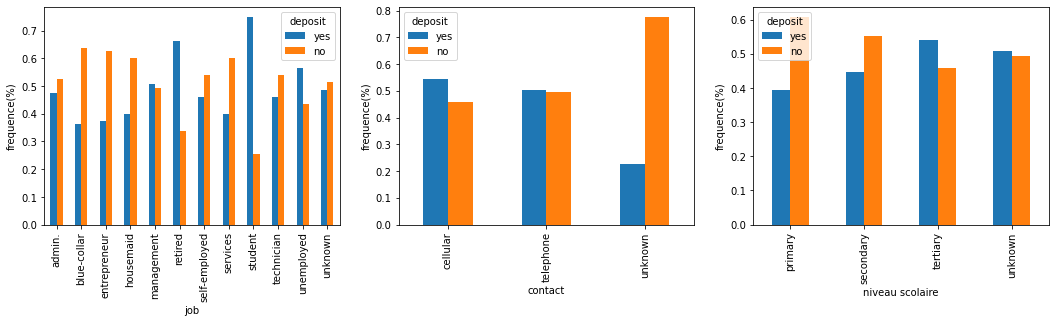

In [125]:
fig, axes = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
# print(axes)

tmp_df = pd.crosstab(df.job, df.deposit, normalize=0)
tmp_df['job'] = tmp_df.index
tmp_df.plot.bar(ax=axes[0], x='job', y=['yes','no'], ylabel='frequence(%)')

tmp_df = pd.crosstab(df.contact, df.deposit, normalize=0)
tmp_df['contact'] = tmp_df.index
tmp_df.plot.bar(ax=axes[1], x='contact', y=['yes','no'], ylabel='frequence(%)')

tmp_df = pd.crosstab(df.education, df.deposit, normalize=0)
tmp_df['education'] = tmp_df.index
tmp_df.plot(ax = axes[2],kind='bar', x='education', y=['yes','no'], xlabel='niveau scolaire', ylabel='frequence(%)');

👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

 
 *  **`job`**: 
  * Les étudiants et les retraités sont les statuts où il y a le plus d'adhésion. 
  * Les ouvriers, les entrepreneurs, les ménagères suivi des services sont ceux où il y a le plus de non-adhésion. 
  * nous avons une classe *unknown* qui représente des valeurs non connues. La répartition de la target est équilibrée sur cette classe 'unknown'.

 
 * **`contact`**: 
  * Nous n'observons pas de disparité entre les éléments de la classe cible en fonction de la variable 'contact'.  
  * Cependant, nous avons un mode *unknown* pour lequel il y a une grande différence entre l'adhésion et la non adhésion.

 
 * **`education`**: 
  * Pour ceux qui ont un niveau primaire, il y a une proportion plus importante qui n'adhère pas à la souscription. Cette observation continue pour le niveau secondaire. 
  * Pour ceux qui ont fait des études supérieures, on note un pourcentage d'adhésion légèrement supérieur à la non adhésion.

#### Variables **`marital`**, **`default`** et **`poutcome`**


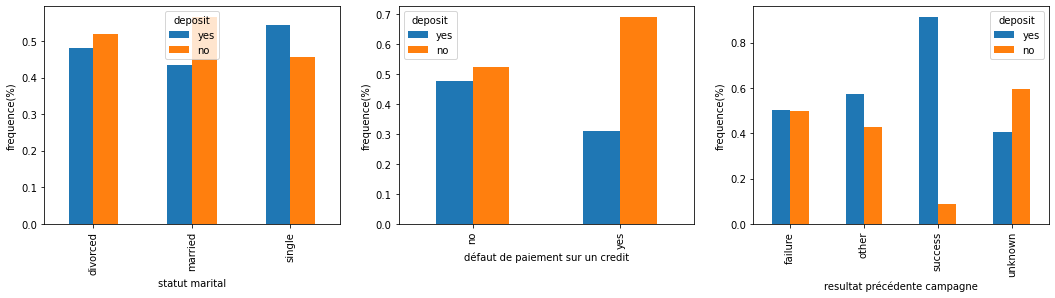

In [126]:
fig, axes = plt.subplots(figsize=(18,4), nrows=1, ncols=3)

tmp_df = pd.crosstab(df.marital, df.deposit, normalize=0)
tmp_df['marital'] = tmp_df.index
tmp_df.plot.bar(ax = axes[0], x='marital', y=['yes','no'], xlabel='statut marital', ylabel='frequence(%)')

tmp_df = pd.crosstab(df.default, df.deposit, normalize=0)
tmp_df['default'] = tmp_df.index
tmp_df.plot(ax=axes[1], kind='bar', x='default', y=['yes','no'], xlabel='défaut de paiement sur un credit', ylabel='frequence(%)')

tmp_df = pd.crosstab(df.poutcome, df.deposit, normalize=0)
tmp_df['poutcome'] = tmp_df.index
tmp_df.plot(ax=axes[2], kind='bar', x='poutcome', y=['yes','no'], xlabel='resultat précédente campagne', ylabel='frequence(%)');

👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

* **`marital`**: Les personnes mariées adhèrent moins au nouveau produit qu'ils n'y adhèrent. On a un comportement contraire pour les célibataires.

* **`default`**: Les personnes ayant un défaut de paiement adhèrent moins.

* **`poutcome`**:
  * Les personnes qui ont eu un succès lors de la précédente campagne adhèrent en proportion importante au nouveau produit.
  * La classe **unknown** correspond aux personnes qui n'ont pas fait la précédente campagne. Ils ont un **`previous`**=0 et un **`pdays`**=-1. On va le vérifier par la suite.
  * La classe **other** nécessite à ce qu'on se penche plus pour savoir de quoi il s'agit.

#### Variables **`loan`** et **`housing`**


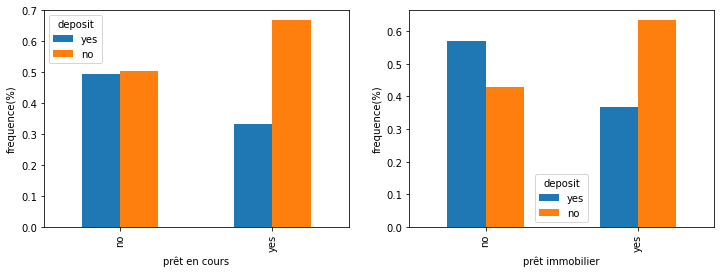

In [127]:
fig, axes = plt.subplots(figsize=(12,4),nrows=1, ncols=2)

tmp_df = pd.crosstab(df.loan, df.deposit, normalize=0)
tmp_df['loan'] = tmp_df.index
tmp_df.plot(ax=axes[0], kind='bar', x='loan', y=['yes','no'], xlabel='prêt en cours', ylabel='frequence(%)')

tmp_df = pd.crosstab(df.housing, df.deposit, normalize=0)
tmp_df['housing'] = tmp_df.index
tmp_df.plot(ax=axes[1], kind='bar', x='housing', y=['yes','no'], xlabel='prêt immobilier', ylabel='frequence(%)');

👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

* **`loan`**: Les personnes ayant un prêt n'adhèrent pas en majorité au nouveau produit.

* **`housing`**: Il en est de même pour les personnes ayant un prêt immobilier.
Nous allons tout de même vérifier que un prêt immobilier n'est pas considéré comme un prêt.

### Vérification de l'origine de la classe **"other"** (variable **`poutcome`**) 

In [128]:
# vérification des éléments de la classe 'other'
df[df['poutcome']=='other'].describe()

,age,balance,day,duration,campaign,pdays,previous
count,537.00,537.00,537.00,537.00,537.00,537.00,537.00
mean,40.24,1937.72,15.38,358.43,2.22,216.48,4.16
std,12.41,4880.88,8.57,305.24,1.64,127.27,5.41
min,19.00,-522.00,1.00,5.00,1.00,1.00,1.00
25%,31.00,175.00,8.00,149.00,1.00,109.00,1.00
50%,37.00,725.00,15.00,273.00,2.00,190.00,2.00
75%,47.00,2022.00,21.00,457.00,3.00,320.00,5.00
max,84.00,81204.00,31.00,2053.00,9.00,805.00,58.00


👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

La classe **"other"** correspond aux clients qui ont déjà été contactés précédemment avant la campagne en cours pour lesquels on n'a pas un résultat de la campagne précédente.

### Vérification de l'origine de la classe **"unknown"** (variable **`poutcome`**) 

In [129]:
# vérification des éléments de la classe 'unknown'
df[df['poutcome']=='unknown'].describe()

,age,balance,day,duration,campaign,pdays,previous
count,8326.00,8326.00,8326.00,8326.00,8326.00,8326.00,8.33e+03
mean,41.04,1441.78,16.06,380.91,2.72,-0.97,3.60e-04
std,11.52,3044.99,8.44,366.91,3.03,2.34,2.45e-02
min,18.00,-6847.00,1.00,2.00,1.00,-1.00,0.00e+00
25%,32.00,95.00,8.00,131.00,1.00,-1.00,0.00e+00
50%,39.00,497.00,16.00,250.00,2.00,-1.00,0.00e+00
75%,49.00,1588.00,22.00,525.00,3.00,-1.00,0.00e+00
max,95.00,66653.00,31.00,3881.00,63.00,188.00,2.00e+00


In [130]:
df[(df['poutcome']=='unknown') & (df['pdays'] > -1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2848,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,yes
5220,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,yes


👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

On constate que la classe **"unkown"** contient au moins une observation d'un client qui a déjà été contacté précédemment au vu de la valeur **"max"** de la variable **`pdays`** et **`previous`**.

En regardant de manière détaillée, on se rend compte qu'il y a 2 observations concernées. Ces observations doivent sans doute être de la classe **"other"** au lieu de **"unknown"**.



### Vérification de la différence entre la variable **`loan`** et la variable **`housing`**


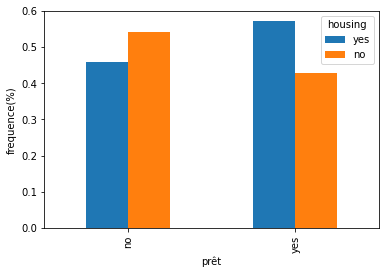

In [131]:
tmp_df = pd.crosstab(df.loan, df.housing, normalize=0)

tmp_df['housing'] = tmp_df.index
tmp_df.plot.bar(x='housing', y=['yes','no'], xlabel='prêt', ylabel='frequence(%)');

👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

* Un prêt (**`loan`**) n'est pas un prêt immobilier(**`housing`**) car il y a des personnes sans prêt qui ont un prêt immobilier. Ainsi, il fort probable que la variable **`loan`** doit être vu comme la détention ou non d'un crédit à la consommation.

## **3.3 Conclusion de l'analyse exploratoire des données**

### Définition d'un personna afin mieux comprendre nos futurs clients :

Lors d'une campagne de marketing, définir intelligemment sa cible est un enjeu crucial. Ainsi, la réalisation d'une analyse exploratoire de nos données nous a permis de réaliser un premier portrait-robot du prospect idéal parmis les clients contactés : 

 #### **👤 Sociologie des clients contactés souscrivant à un produit 👤 :** 

  * **Quel est leur niveau d'éducation ?** les personnes ayant réalisé des études supérieures, adhèrents plus facilement au produit financier proposé.

  * **À quelle génération appartiennent-ils ?** On note, relativement, une proportion d'adhésion largement supérieure à celle de non-adhésion chez les personnes de plus de 60 ans. Cependant, la variable **`job`** vient contraster ce constat en ajoutant les étudiants (donc des profils plus jeunes aussi). Notons tout de même que les personnes de plus de 60 ans adhèrent plus rapidement (cf. **`duration`**) que les jeunes.

  * **Quelle est leur situation familiale ?** Nous pouvons voir que les personnes célibataires sont plus à même d'adhérer au produit proposé.

  * **Quelle est leur situation financière ?** La résultante de notre analyse, est que les personnes ayants des dettes (crédits à la consommation & crédits immobiliers)  et/ou des défauts de paiements adhérents moins. À contrario, les personnes disposant d'un solde bancaire > 5000 euros, ont tendance à souscrire au produit proposé.
  * Dernier élément, sortant du lot, est qu'un client ayant souscrit à un produit lors de la précédente campagne, est plus propice à vouloir souscrire un nouveau contrat.

# 4. Prétraitement des données (Data pre-processing)

## **4.1 Suppressions de certaines colonnes**
Nous avons décidé de supprimer les colonnes **contact**, **day** et **month** car après analyse, elles ne permettent pas de caractériser le deposit.

In [132]:
df = df.drop(['contact', 'day', 'month'], axis=1)
df_initial = df.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,-1,0,unknown,yes


## **4.2 Suppression des doublons (Duplicates)**
Nous supprimons les observations dupliquées s'il y en a.

In [133]:
print("Nombre de doublons :", df.duplicated().sum()) 
#df.drop_duplicates(inplace=True)

Nombre de doublons : 0


❓ **POURQUOI ? :**

* Des observations dupliquées indésirables peuvent discréditer l'évaluation des performances d'un modèle.
* Afin d'évaluer la capacité d'un modèle à généraliser, il est crucial que les données de l'ensemble de test restent invisibles pour l'algorithme tout au long de la phase d'entrainement.
* Si des doublons existent à la fois dans la formation et les tests, cela peut entraîner des scores non fiables (⚠️  **Data Leakage**) 

## **4.3 Traitement des valeurs manquantes (Missing values)**

### Colonnes numériques

In [134]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics_df = df.select_dtypes(include=numerics)
numerics_df.isnull().sum().sort_values(ascending=False)/len(numerics_df)  

previous    0.0
pdays       0.0
campaign    0.0
duration    0.0
balance     0.0
age         0.0
dtype: float64

### Colonnes catégoriques 


#### Variable catégorique **job** :


In [135]:
# Vérifier les valeurs uniques dans la colonne
print(df.job.unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


In [136]:
df['job'] = df['job'].replace('unknown',np.nan)
print(df.job.unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' nan 'self-employed' 'student']


In [137]:
#df = df.replace("unknown", np.nan) # Remplacer les occurrences de "unknown" par np.nan 
job_imputer = SimpleImputer(strategy='most_frequent') 
job_imputer.fit(df[['job']])
df['job'] = job_imputer.transform(df[['job']])
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,-1,0,unknown,yes


In [138]:
print(df.job.unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'self-employed' 'student']


#### Variable catégorique **education** :

In [139]:
# Vérifier les valeurs uniques dans la colonne
print(df.education.unique())

['secondary' 'tertiary' 'primary' 'unknown']


In [140]:
df['education'] = df['education'].replace('unknown',np.nan)
print(df.education.unique())

['secondary' 'tertiary' 'primary' nan]


In [141]:
education_imputer = SimpleImputer(strategy='most_frequent') 
education_imputer.fit(df[['education']])
df['education'] = education_imputer.transform(df[['education']])
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,-1,0,unknown,yes


In [142]:
print(df.education.unique())

['secondary' 'tertiary' 'primary']


#### Variable catégorique **poutcome** :

In [143]:
# Vérifier les valeurs uniques dans la colonne
print(df.poutcome.unique())

['unknown' 'other' 'failure' 'success']


In [144]:
# Tous ceux qui ont un poutcome inconnu tandisqu'ils ont des données historiques sur la précédente campagne sont labélisés en 'other'
df.loc[(df['poutcome']=='unknown') & (df['pdays']>-1),'poutcome'] = 'other'

In [145]:
df['poutcome'] = df['poutcome'].replace('unknown','new')
print(df.poutcome.unique())

['new' 'other' 'failure' 'success']


In [146]:
df['poutcome'] = df['poutcome'].replace('other',np.nan)
print(df.poutcome.unique())

['new' nan 'failure' 'success']


In [147]:
print(df.poutcome.value_counts())

new        8324
failure    1228
success    1071
Name: poutcome, dtype: int64


In [148]:
df['poutcome'] = df['poutcome'].replace(np.nan,"failure")
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,-1,0,new,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,-1,0,new,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,-1,0,new,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,-1,0,new,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,-1,0,new,yes


In [149]:
print(df.poutcome.value_counts())

new        8324
failure    1767
success    1071
Name: poutcome, dtype: int64


## **4.4 Mise à l'échelle (Scaling)**

In [150]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,-1,0,new,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,-1,0,new,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,-1,0,new,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,-1,0,new,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,-1,0,new,yes


### Colonnes numériques :

 * Recherche de valeurs aberrantes (Boxplots)
 * Analyse de la distribution(Density) 
 * Appliquer les solutions ci-dessous en conséquence :
- Robust Scaler : présence d'outliers
- Standard Scaler : abscence d'outliers

In [151]:
#colonnes_numeriques = ['age','balance','duration','campaign','pdays','previous']

rb_scaler = RobustScaler() 

df['age'],df['balance'],df['duration'],df['campaign'],df['pdays'],df['previous'] = rb_scaler.fit_transform(df[['age','balance','duration','campaign','pdays','previous']]).T

df.head()


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,1.18,admin.,married,secondary,no,1.13,yes,no,2.20,-0.5,0.0,0.0,new,yes
1,1.00,admin.,married,secondary,no,-0.32,no,no,3.39,-0.5,0.0,0.0,new,yes
2,0.12,technician,married,secondary,no,0.45,yes,no,3.17,-0.5,0.0,0.0,new,yes
3,0.94,services,married,secondary,no,1.21,yes,no,0.91,-0.5,0.0,0.0,new,yes
4,0.88,admin.,married,tertiary,no,-0.23,no,no,1.17,0.0,0.0,0.0,new,yes


## **4.5 Encoding**


###Variable cible 

#### Variable **deposit** :

In [152]:
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])
df.head()
# df.deposit.value_counts(normalize=True)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,1.18,admin.,married,secondary,no,1.13,yes,no,2.20,-0.5,0.0,0.0,new,1
1,1.00,admin.,married,secondary,no,-0.32,no,no,3.39,-0.5,0.0,0.0,new,1
2,0.12,technician,married,secondary,no,0.45,yes,no,3.17,-0.5,0.0,0.0,new,1
3,0.94,services,married,secondary,no,1.21,yes,no,0.91,-0.5,0.0,0.0,new,1
4,0.88,admin.,married,tertiary,no,-0.23,no,no,1.17,0.0,0.0,0.0,new,1


### Colonnes catégoriques

In [153]:
encoder = OneHotEncoder()
columnsToEncode = ['job', 'education', 'poutcome', 'marital']
encoder.fit(df[columnsToEncode])

# column_names = encoder.get_feature_names_out()
column_names = pd.Series(encoder.get_feature_names()).apply(lambda x: x[3:])
X_ohe = pd.DataFrame(encoder.transform(df[columnsToEncode]).toarray(), columns= column_names)

df.drop(columnsToEncode, axis=1, inplace=True)

df = pd.concat([df, X_ohe], axis=1)

df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,deposit,...,unemployed,primary,secondary,tertiary,failure,new,success,divorced,married,single
0,1.18,no,1.13,yes,no,2.20,-0.5,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.00,no,-0.32,no,no,3.39,-0.5,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.12,no,0.45,yes,no,3.17,-0.5,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.94,no,1.21,yes,no,0.91,-0.5,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.88,no,-0.23,no,no,1.17,0.0,0.0,0.0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### Colonnes catégoriques binaires

#### Variable **default** - **loan** - **housing** :

In [154]:
print("Variable default : ",df.default.unique(),"\n")
print("Variable loan : ",df.loan.unique(),"\n")
print("Variable housing : ",df.housing.unique(),"\n")

Variable default :  ['no' 'yes'] 

Variable loan :  ['no' 'yes'] 

Variable housing :  ['yes' 'no'] 



In [155]:
binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['default'], df['loan'], df['housing'] = binary_encoder.fit_transform(df[['default', 'loan', 'housing']]).T
df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,deposit,...,unemployed,primary,secondary,tertiary,failure,new,success,divorced,married,single
0,1.18,0.0,1.13,1.0,0.0,2.20,-0.5,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.00,0.0,-0.32,0.0,0.0,3.39,-0.5,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.12,0.0,0.45,1.0,0.0,3.17,-0.5,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.94,0.0,1.21,1.0,0.0,0.91,-0.5,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.88,0.0,-0.23,0.0,0.0,1.17,0.0,0.0,0.0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# 5. Modèles de classification

## **Préambule**

Afin de mener à bien notre phase de modélisation, nous sommes passés par plusieurs étapes, qu'il est important de rappeler ici, pour mieux comprendre le cheminement de notre réflexion :

--- 
* **Premièrement :** En nous appuyant sur les **données complètes** (issue de notre Pre Processing), nous avons implémenté deux modèles :
  * **Un baseline Model [5.0]:** Ce classificateur sert de référence "simple" à comparer avec d'autres classificateurs plus complexes.
  * **Une Régression logistique [5.1]:** Cette dernière nous a permis d'interpréter statiquement(au seuil de 10 %) chacune de nos variables.
---
* **Deuxièmement :** nous avons retiré de notre dataset la variable **`previous`** car lors de notre EDA, il s'est avéré que cette dernière était corrélée avec **`pdays`**. Ainsi, l'objectif de cette manœuvre était de voir si nous avions une amélioration/invariance de la précision de notre modèle. 
  Modèle utilisé dans cette partie :
  * **Une Régression logistique [5.2] sans la variable** **`previous`**.
La variable **`previous`** n'a en effet pas de poids dans la modélisation puisque le score obtenu avec et sans cette variable est similaire. Ainsi, nous avons fait le choix de retirer cette variable de notre modèle. 
---
 
* **Troisièmement :** Nous avons voulu opérer une *Feature Selection*. Pour cela, nous avons combiné les résultats de deux approches :
  * **Arbre de décision [5.3]:** Cette dernière nous a permis d'obtenir un tableau avec le degré d'importance de nos différentes variables. Nous avons considéré que les variables qui ont un dégré d'importance non nul.
  * **Une Régression logistique [5.2]sans la variable** **`previous`** Nous avons cherché à comparer le tableau, issue de notre arbre de décision, avec les résultats (p-value de nos variables) de notre régression logistique. Nous avons pris en compte toutes les variables significatives au seuil 10% et inférieur.

---
 
* **Quatrièmement :** Après avoir effectué la *Feature Selection*, nous avons soumis notre nouveau dataset aux algorithmes suivants :
  * **Régression logistique [5.4]:** 
  * **KNN [5.5]**
  * **Random Forest [5.6]**
 
Ainsi, veuillez trouver ci-après le détail de nos différentes étapes.


* **Split du Dataframe :**

In [156]:
X = df.drop(["deposit"], axis=1) # Variables explicatives 
y = df['deposit'] # target

* **Split en données d'entrainements et en données de test :**

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

* **[Fonction ](https://pythonguides.com/scikit-learn-logistic-regression/)    pour calculer la p-value d'un modèle :**


In [158]:
def logit_p1value(model, x):
   
    p1 = model.predict_proba(x)
    n1 = len(p1)
    m1 = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    answ = np.zeros((m1, m1))
    
    for i in range(n1):
        answ = answ + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p1[i,1] * p1[i, 0]
    
    vcov = np.linalg.inv(np.matrix(answ))

    se = np.sqrt(np.diag(vcov))
    t1 =  coefs/se  
    p1 = (1 - norm.cdf(abs(t1))) * 2
    
    return p1

## **5.0 Baseline Model [DONNÉES COMPLÈTES]**

### Entrainement modèle

In [159]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

### Performance du modèle

#### Matrice de confusion

In [160]:
y_test_pred_0 = dummy_clf.predict(X_test)
y_train_pred_0 = dummy_clf.predict(X_train)

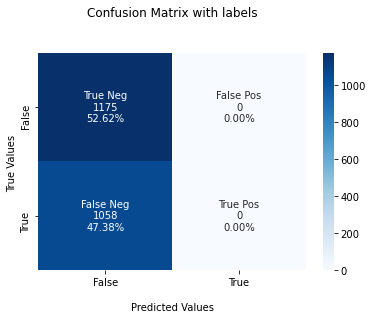

In [161]:
cf_matrix = confusion_matrix(y_test,y_test_pred_0)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

#### Accuracy score

In [162]:
print("Evaluation de l'overfitting :\n\n")
print("Accuracy score Données d'entrainement :", np.round(accuracy_score(y_train,y_train_pred_0)*100,2),'%')
print('Accuracy score Données de test :', np.round(accuracy_score(y_test,y_test_pred_0)*100,2),'%')

Evaluation de l'overfitting :


Accuracy score Données d'entrainement : 52.62 %
Accuracy score Données de test : 52.62 %


## **5.1 Régression logistique [DONNÉES COMPLÈTES]** 

### Entrainement modèle

In [163]:
# initialisation du modèle
model_lr = LogisticRegression(solver='newton-cg')

# entrainement du modèle
model_lr.fit(X_train,y_train)

# résultat de l'entrainement du modèle
resultats = pd.DataFrame(data=X_train.columns, columns=['Variables'])
resultats['coefs'] = model_lr.coef_[0]
resultats['odds_ratio']=np.exp(resultats['coefs'])
pvalue = logit_p1value(model_lr, X_train)
resultats['p-value'] = pvalue[1:]

resultats.sort_values(by='p-value', ascending=True)

,Variables,coefs,odds_ratio,p-value
3,housing,-1.04e+00,0.35,0.00e+00
5,duration,1.82e+00,6.20,0.00e+00
6,campaign,-2.41e-01,0.79,0.00e+00
4,loan,-5.84e-01,0.56,5.53e-11
2,balance,5.40e-02,1.06,1.92e-04
8,previous,2.40e-02,1.02,1.20e-01
1,default,-3.41e-01,0.71,1.45e-01
7,pdays,5.89e-03,1.01,5.53e-01
0,age,-9.46e-03,0.99,8.66e-01
25,success,1.66e+00,5.27,1.00e+00


👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

Dans le cadre de notre interprétation, nous nous appuyons sur un niveau de significativité de 10%.
* **Classe positive :** 1 ⇒ souscription du contrat. 
* **Classe négative :** 0 ⇒ non-souscription du contrat.
 
**Afin de les interpréter, les odds-ratios sont classés en 2 catégories :**
 
    * les odds-ratios positifs :
 
Globalement, si l'odd-ratio est supérieur à 1, cela signifie qu'une augmentation de la variable à laquelle est adossé le paramètre, **augmente** les chances d'appartenir à la classe positive (souscription du contrat).

*  **`duration` avec un odds-ratio de 6,2** : Lorsque la durée (en secondes) du dernier contact de la campagne, en cours, augmente d’une  1 unité, alors les chances que le client souscris un contrat augmentent de 519% 
 
*  **`balance` avec un odds ratio de 1,06** : Lorsque le montant des encours détenus par un client augmente d’une 1 unité, alors les chances que ce même client souscris un contrat augmentent de 6%.
 
*  **`pdays` avec un odds ratio de 1,03** : Lorsque le nombre de jours qui se sont écoulés depuis que le client a été contacté, pour la dernière fois lors d'une campagne précédente, augmente d’une 1 unité, alors les chances que ce même client souscris un contrat augmentent de 3%.

*  **`previous` avec un odds ratio 1,05** : Lorsque le nombre de contacts effectués avant cette campagne et pour ce client augmente d’une 1 unité, alors les chances que ce même client souscris un contrat augmentent de 5%.


    * les odds ratios négatifs :
 
Globalement, si l'odd ratio est inférieur à 1, cela signifie qu'une augmentation de la valeur de la variable **diminue** les chances d'appartenir à la classe positive (souscription du contrat).
 
 
*  **`housing` avec un odds ratio de 0.35** : Tout d'abord, on prend l'inverse de 0.35, on obtient alors 2,86. On déduit que lorsque qu'un client a un prêt immobilier, alors cela diminue les chances de 186% de souscrire un contrat.
 
*  **`campaign` avec un odds ratio de 0.78** : Tout d'abord, on prend l'inverse de 0.78, on obtient alors 1,28. On déduit que lorsque le nombre de contacts effectués au cours de cette campagne et pour un client donné augmente d’une unité, alors cela diminue les chances de 28% de souscrire un contrat.
 
*  **`loan` avec un odds ratio de 0,55** : Tout d'abord, on prend l'inverse de 0.55, on obtient alors 1,82. On déduit que lorsque qu'un client a un prêt à la consommation, alors cela diminue les chances de 82% de souscrire un contrat.



Concernant le reste des variables :

* soit ces dernières étaient non significatives au seuil de 10%
* soit on ne disposait pas de leur p-value pour évaluer leurs significativités.


### Performance du modèle

In [164]:
# X_test
y_test_pred = model_lr.predict(X_test)
# X_train
y_train_pred = model_lr.predict(X_train)

#### Matrice de confusion

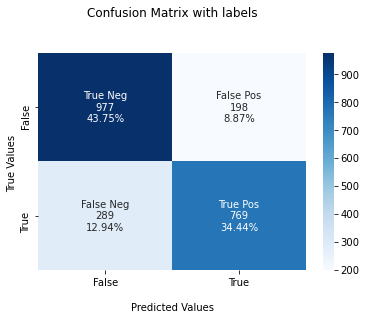

In [165]:

cf_matrix = confusion_matrix(y_test,y_test_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

#### Accuracy score

In [166]:
print("Evaluation de l'overfitting :\n\n")
print("Accuracy score Données d'entrainement :", np.round(accuracy_score(y_train,y_train_pred)*100,2),'%')
print('Accuracy score Données de test :', np.round(accuracy_score(y_test,y_test_pred)*100,2),'%')

Evaluation de l'overfitting :


Accuracy score Données d'entrainement : 79.94 %
Accuracy score Données de test : 78.19 %


👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

* L’évaluation nous montre que notre modèle ne souffre pas d'overfitting.

* Nous avions, noté à l'aide de la matrice de covariance, une corrélation entre les variables **`pdays`** et **`previous`**. Nous allons, ci-après, faire un modèle en ne considérant qu'une seule de ces deux variables.



## **5.2 Régression logistique [DONNÉES SANS VARIABLE `PREVIOUS`]** 

### Entrainement modèle

In [167]:
# initialisation du modèle
model_lr2 = LogisticRegression(solver='newton-cg')

# entrainement du modèle
model_lr2.fit(X_train,y_train)

# résultat de l'entrainement du modèle
resultats = pd.DataFrame(data=X_train.columns, columns=['Variables'])
resultats['coefs'] = model_lr2.coef_[0]
resultats['odds_ratio']=np.exp(resultats['coefs'])
pvalue = logit_p1value(model_lr2, X_train)
resultats['p-value'] = pvalue[1:]

resultats.sort_values(by='p-value', ascending=True)

,Variables,coefs,odds_ratio,p-value
3,housing,-1.04e+00,0.35,0.00e+00
5,duration,1.82e+00,6.20,0.00e+00
6,campaign,-2.41e-01,0.79,0.00e+00
4,loan,-5.84e-01,0.56,5.53e-11
2,balance,5.40e-02,1.06,1.92e-04
8,previous,2.40e-02,1.02,1.20e-01
1,default,-3.41e-01,0.71,1.45e-01
7,pdays,5.89e-03,1.01,5.53e-01
0,age,-9.46e-03,0.99,8.66e-01
25,success,1.66e+00,5.27,1.00e+00


### Performance du modèle

In [168]:
# X_test
y_test_pred_2 = model_lr2.predict(X_test)
# X_train
y_train_pred_2 = model_lr2.predict(X_train)

#### Matrice de confusion

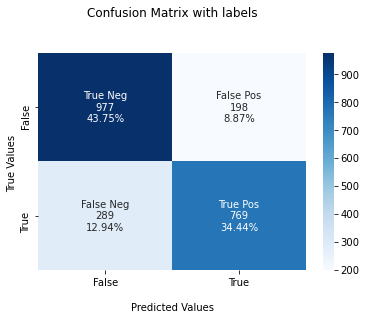

In [169]:
cf_matrix = confusion_matrix(y_test,y_test_pred_2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

#### Accuracy score


In [170]:
print("Evaluation de l'overfitting :\n\n")
print("Accuracy score Données d'entrainement :", np.round(accuracy_score(y_train,y_train_pred_2)*100,2),'%')
print('Accuracy score Données de test :', np.round(accuracy_score(y_test,y_test_pred_2)*100,2),'%')

Evaluation de l'overfitting :


Accuracy score Données d'entrainement : 79.94 %
Accuracy score Données de test : 78.19 %


👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

* L’évaluation nous montre que notre modèle ne souffre pas d'overfitting.

* Le retrait de la variable **`previous`** ne permet pas une amélioration de l'estimation de notre modèle. Nous allons appliquer un autre modèle, à l'instar de **l'arbre de décision**, qui mettra en exergue les variables importantes afin qu'on fasse une sélection de variables pour entrainer un autre modèle en espérant avoir de meilleures performances.

## **5.3 Arbre de décision [DONNÉES SANS VARIABLE `PREVIOUS`]**

### Grid Search

In [171]:
start = time.time()
param_grid = {'max_depth': np.arange(2,20,2), 'min_samples_split': np.arange(50,300,50), 'min_samples_leaf': np.arange(20,140,40)}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = KFold(5, shuffle=True, random_state=10))

grid.fit(X_train,y_train)
end = time.time()

elapsed_time = end - start

print("Le temps mis par GridSearch est de", np.round(elapsed_time,2), "s")

print(" la profondeur optimale de l'arbre est :", grid.best_params_['max_depth'],"\n",\
      "avec un nombre minimal d'observations par feuille de :", grid.best_params_['min_samples_leaf'],"\n",\
      "un nombre minimun de", grid.best_params_['min_samples_split'], 'observations pour effectuer le split',"\n",\
      "et un score d'accuracy de :", np.round(grid.best_score_*100,2), '%')

Le temps mis par GridSearch est de 16.71 s
 la profondeur optimale de l'arbre est : 12 
 avec un nombre minimal d'observations par feuille de : 20 
 un nombre minimun de 200 observations pour effectuer le split 
 et un score d'accuracy de : 81.11 %


### Entrainement modèle

In [172]:
arbre = DecisionTreeClassifier(max_depth=12, min_samples_split = 200, min_samples_leaf=20)
arbre.fit(X_train, y_train)
impVarFirst= {'Variable': X_train.columns, 
             'Importance': arbre.feature_importances_}

print("variables par ordre d'importance pour l'établissement de l'arbre de décision")
pd.DataFrame(impVarFirst).sort_values(by='Importance', ascending=False)

variables par ordre d'importance pour l'établissement de l'arbre de décision


,Variable,Importance
5,duration,5.65e-01
25,success,1.84e-01
3,housing,1.01e-01
0,age,4.08e-02
2,balance,3.54e-02
7,pdays,3.44e-02
6,campaign,1.30e-02
8,previous,9.03e-03
4,loan,6.40e-03
22,tertiary,4.49e-03


### Évaluation du modèle

In [173]:
# X_test
y_test_pred_3 = arbre.predict(X_test)
# X_train
y_train_pred_3 = arbre.predict(X_train)

#### Matrice de confusion

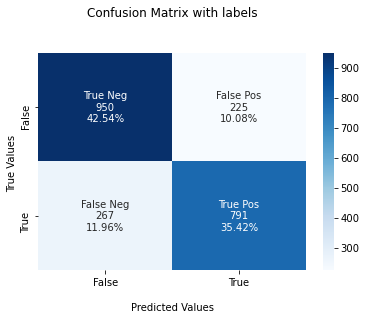

In [174]:
cf_matrix = confusion_matrix(y_test,y_test_pred_3)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Accuracy score


In [175]:
print("Evaluation de l'overfitting :\n\n")
print("Accuracy score Données d'entrainement :", np.round(accuracy_score(y_train,y_train_pred_3)*100,2),'%')
print('Accuracy score Données de test :', np.round(accuracy_score(y_test,y_test_pred_3)*100,2),'%')

Evaluation de l'overfitting :


Accuracy score Données d'entrainement : 82.37 %
Accuracy score Données de test : 77.97 %


## **5.4 Régression logistique [DONNÉES ISSUES DE LA FEATURE SELECTION]** 

In [176]:
X_red = df.drop(["deposit", "retired", "secondary", "technician", "services",\
                 "unemployed", "entrepreneur", "housemaid", "blue-collar",\
                 "failure", "self-employed", "student", "new", "divorced", "previous"], axis=1)

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y, test_size=0.2, stratify=y, random_state=10)

### Entrainement modèle

In [177]:
# initialisation du modèle
model_lr3 = LogisticRegression(solver='newton-cg')

# entrainement du modèle
model_lr3.fit(X_train_red,y_train_red)

# résultat de l'entrainement du modèle
resultats = pd.DataFrame(data=X_train_red.columns, columns=['Variables'])
resultats['coefs'] = model_lr3.coef_[0]
resultats['odds_ratio']=np.exp(resultats['coefs'])
pvalue = logit_p1value(model_lr3, X_train_red)
resultats['p-value'] = pvalue[1:]

resultats.sort_values(by='odds_ratio', ascending=False)

,Variables,coefs,odds_ratio,p-value
12,success,2.49,12.01,0.00e+00
5,duration,1.80,6.03,0.00e+00
11,tertiary,0.38,1.47,2.23e-07
14,single,0.24,1.27,1.94e-02
8,admin.,0.24,1.27,7.17e-03
0,age,0.10,1.10,3.51e-02
2,balance,0.06,1.06,6.73e-05
7,pdays,0.05,1.05,0.00e+00
13,married,-0.11,0.89,2.09e-01
9,management,-0.11,0.89,1.55e-01


👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**

Nous constatons qu'après le retrait des variables non importantes, non significatives, toutes les variables utilisées sont significatives.

___

Les variables qui permettent d'avoir une grande chance d'adhérer au produit sont les suivantes \:
- **`success`**
- **`duration`**

Elles sont suivies des variables suivantes qui permettent également d'avoir une chance d'adhérer au nouveau produit \:
- **`tertiary`**
- **`single`**
- **`admin.`**
- **`age`**
- **`balance`**
- **`pdays`**

___
Le modèle met aussi en avant des variables qui donnent plus de chance de ne pas adhérer au produit :
- **`housing`**     
- **`loan`**      
- **`default`**   
- **`campaign`**  
- **`primary`**   
- **`management`**

On retrouve ainsi les observations faites lors de l'analyse descriptive des données.
___

### Évaluation modèle

In [178]:
# X_test
y_test_pred_4 = model_lr3.predict(X_test_red)
# X_train
y_train_pred_4 = model_lr3.predict(X_train_red)

#### Matrice de confusion

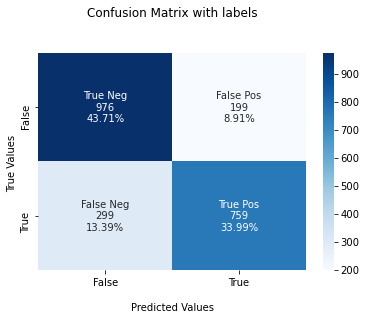

In [179]:
cf_matrix = confusion_matrix(y_test_red,y_test_pred_4)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

#### Accuracy score


In [180]:
print("Evaluation de l'overfitting :\n\n")
print("Accuracy score Données d'entrainement :", np.round(accuracy_score(y_train_red,y_train_pred_4)*100,2),'%')
print('Accuracy score Données de test :', np.round(accuracy_score(y_test_red,y_test_pred_4)*100,2),'%')

Evaluation de l'overfitting :


Accuracy score Données d'entrainement : 79.7 %
Accuracy score Données de test : 77.7 %


## **5.5 KNN [DONNÉES ISSUES DE LA FEATURE SELECTION]**

### Grid Search

Le temps mis par la boucle est de 15.84 s
le nombre de voisins optimal est  0.7858686646011077


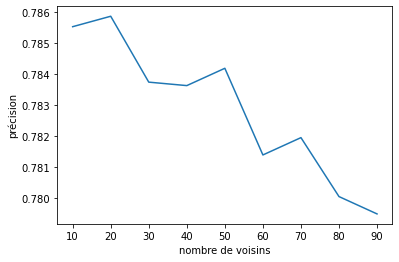

In [181]:
KFold_1 = KFold(10, shuffle=True, random_state=10)

start = time.time()
scores = []
for k in np.arange(10,100,10):
  knn = KNeighborsClassifier(n_neighbors = k) 
  scores.append(cross_val_score(knn, X_train_red, y_train, cv=KFold_1).mean())

plt.plot(np.arange(10,100,10), scores)
plt.xlabel('nombre de voisins')
plt.ylabel('précision');
end = time.time()

print("Le temps mis par la boucle est de", np.round((end - start),2), "s")
print("le nombre de voisins optimal est ", scores[1])

### Entrainement modèle

In [182]:
knn = KNeighborsClassifier(n_neighbors = 20)

knn.fit(X_train_red, y_train_red)

KNeighborsClassifier(n_neighbors=20)

### Performance du modèle

In [183]:
# X_test
y_test_pred_5 = knn.predict(X_test_red)
# X_train
y_train_pred_5 = knn.predict(X_train_red)

#### Matrice de confusion

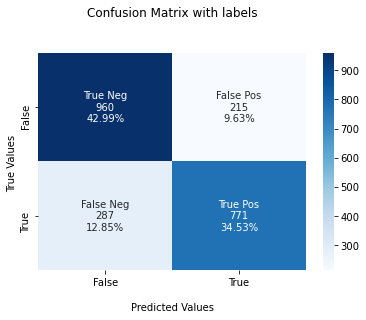

In [184]:
cf_matrix = confusion_matrix(y_test_red,y_test_pred_5)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

#### Accuracy score


In [185]:
print("Evaluation de l'overfitting :\n\n")
print("Accuracy score Données d'entrainement :", np.round(accuracy_score(y_train_red,y_train_pred_5)*100,2),'%')
print('Accuracy score Données de test :', np.round(accuracy_score(y_test_red,y_test_pred_5)*100,2),'%')

Evaluation de l'overfitting :


Accuracy score Données d'entrainement : 80.66 %
Accuracy score Données de test : 77.52 %


👉 **INTERPRÉTATION DES RÉSULTATS OBTENUS :**  

Les performances obtenues avec le **KNN** sont faibles par rapport au modèle de régression logistique. Nous allons maintenant passer au **Random Forest**.


## **5.6 Random Forest [DONNÉES ISSUES DE LA FEATURE SELECTION]**

### Grid search

In [186]:
start = time.time()
param_grid = {'n_estimators': np.arange(200,410,50), 'max_depth': np.arange(2,5,1)}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = KFold(5, shuffle=True, random_state=10))

grid.fit(X_train_red,y_train_red)
end = time.time()

elapsed_time = end - start

print("Le temps mis par GridSearch est de", np.round(elapsed_time,2), "s")
print(grid.best_params_)
print(grid.best_score_)

Le temps mis par GridSearch est de 71.14 s
{'max_depth': 4, 'n_estimators': 400}
0.8068095143992648


### Entrainement du modèle

In [187]:
forest = RandomForestClassifier(max_depth=4, random_state=10, n_estimators=250)
forest.fit(X_train_red, y_train_red)

RandomForestClassifier(max_depth=4, n_estimators=250, random_state=10)

### Performances du modèle

In [188]:
# X_test
y_test_pred_6 = forest.predict(X_test_red)
proba_test_pred = forest.predict_proba(X_test_red)
# X_train
y_train_pred_6 = forest.predict(X_train_red)

#### Matrice de confusion

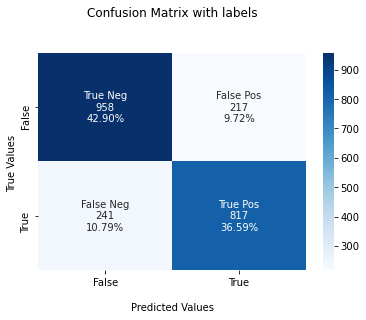

In [189]:
cf_matrix = confusion_matrix(y_test_red,y_test_pred_6)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

#### Accuracy score


In [190]:
print("Evaluation de l'overfitting :\n\n")
print("Accuracy score Données d'entrainement :", np.round(accuracy_score(y_train_red,y_train_pred_6)*100,2),'%')
print('Accuracy score Données de test :', np.round(accuracy_score(y_test_red,y_test_pred_6)*100,2),'%')

Evaluation de l'overfitting :


Accuracy score Données d'entrainement : 81.55 %
Accuracy score Données de test : 79.49 %


#### Courbe ROC globale

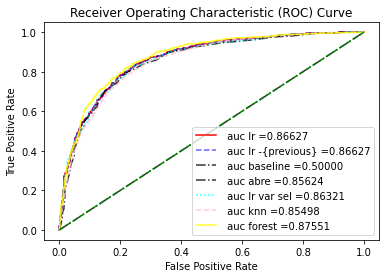

In [191]:
#Baseline Model
prob_0 = dummy_clf.predict_proba(X_test)
prob_0 = prob_0[:, 1]
fper_0, tper_0, thresholds_0 = roc_curve(y_test, prob_0)
aucf_model0 = auc(fper_0, tper_0)

# Lr
prob_1 = model_lr.predict_proba(X_test)
prob_1 = prob_1[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob_1)
aucf_model1 = auc(fper, tper)

# Lr2
prob_2 = model_lr2.predict_proba(X_test)
prob_2 = prob_2[:, 1]
fper2, tper2, thresholds2 = roc_curve(y_test, prob_2)
aucf_model2 = auc(fper2, tper2)

# Decision Tree
prob_3 = arbre.predict_proba(X_test)
prob_3 = prob_3[:, 1]
fper3, tper3, thresholds3 = roc_curve(y_test, prob_3)
aucf_model3 = auc(fper3, tper3)
#Lr3
prob_4 = model_lr3.predict_proba(X_test_red)
prob_4 = prob_4[:, 1]
fper4, tper4, thresholds4 = roc_curve(y_test_red, prob_4)
aucf_model4 = auc(fper4, tper4)

#KNN
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train_red, y_train_red)
prob_5 = knn.predict_proba(X_test_red)
prob_5 = prob_5[:, 1]
fper5, tper5, thresholds5 = roc_curve(y_test_red, prob_5)
aucf_model5 = auc(fper5, tper5)

# Random forest
prob_6 = forest.predict_proba(X_test_red)
prob_6 = prob_6[:, 1]
fper6, tper6, thresholds6 = roc_curve(y_test_red, prob_6)
aucf_model6 = auc(fper6, tper6)


plt.plot(fper, tper, color='red', label=' auc lr =%1.5f' % aucf_model1)
plt.plot(fper2, tper2, color='blue', linestyle='--', label=' auc lr -{previous} =%1.5f' % aucf_model2, alpha = 0.6)
plt.plot(fper_0, tper_0, color='black', linestyle='-.', label=' auc baseline =%1.5f' % aucf_model0, alpha = 0.8)

plt.plot(fper3, tper3, color='black', linestyle='-.', label=' auc abre =%1.5f' % aucf_model3, alpha = 0.8)
plt.plot(fper4, tper4, color='cyan', linestyle=':', label=' auc lr var sel =%1.5f' % aucf_model4, alpha = 0.8)
plt.plot(fper5, tper5, color='pink', linestyle='--', label=' auc knn =%1.5f' % aucf_model5, alpha = 0.8)
plt.plot(fper6, tper6, color='yellow', linestyle='-', label=' auc forest =%1.5f' % aucf_model6, alpha = 0.8)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 6. Conclusion

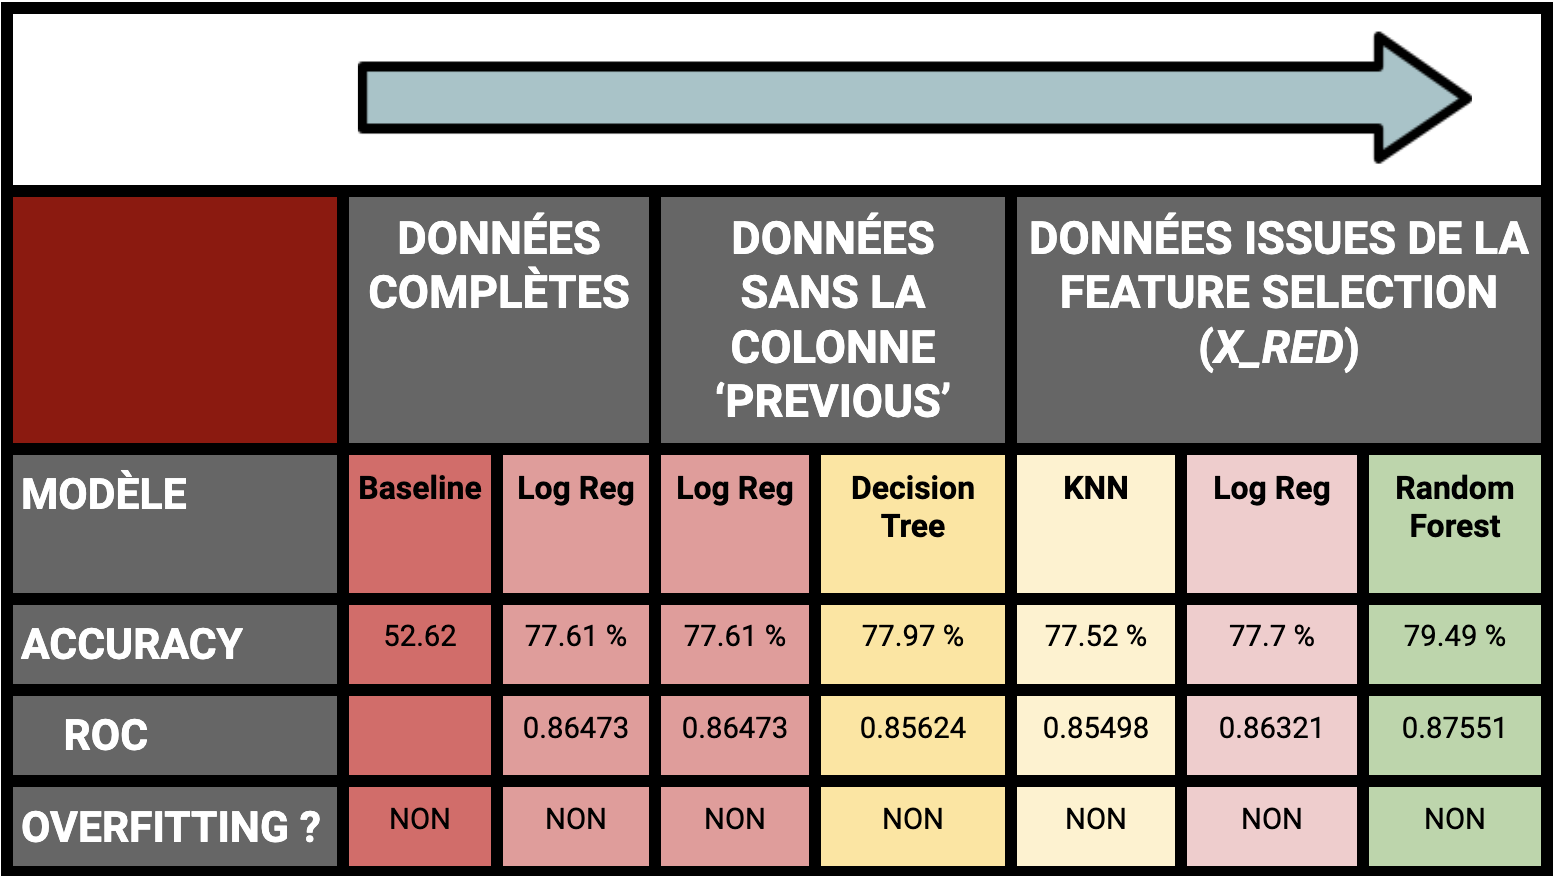

  ___
* Pour conclure, nous pouvons dire que le modèle permettant d'obtenir les meilleurs résultats de prédictions est le **Random Forest**.
Comme nous pouvons le voir sur le tableau précédent, ce dernier obtient la meilleure **accuracy**. Autrement dit, le pourcentage de bonnes prédictions s'élève à **79.49 %** Pour le Random Forest. Ainsi, notre algorithme a été en capacité de bien classer les clients dans **79.49 %** des cas.
 ___
* Les **faux négatifs** (**10,79%**) sont des clients qui peuvent souscrire à un contrat, mais qui ne sont pas détectés par le score. Concrètement, ce sont des clients que nous ne détectons pas et pour lesquels nous ne pourrons pas les pousser à la souscription d’un produit.
 ___
* Les **faux positifs** (**9,72%**) sont les clients pour lesquels le score a prédit une possible souscription d'un produit mais qui sont considérés, en réalité, comme des clients ne remplissant pas les critères conduisant à la souscription d’un produit. C'est-à-dire que pour ces clients, nous engagerons surement des actions marketing pour les conduire à une souscription, mais ces actions n’étaient pas nécessaires puisqu’ils ne répondaient pas aux critères de souscription d’un contrat. **Il faut limiter les faux positifs pour réduire le coût des campagnes.**
___







# Save Model

In [192]:
import joblib
import json

## saving the feature names for the initial dataset

In [193]:
feature_names = df_initial.drop('deposit', axis=1).columns.to_list()
print(feature_names)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [194]:
with open("initial_features.json", "w") as f:
  json.dump(feature_names, f, indent=4)

## saving the feature names for the model

In [195]:
feature_names_model = X_train_red.columns.to_list()
print(feature_names_model)

['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'admin.', 'management', 'primary', 'tertiary', 'success', 'married', 'single']


In [196]:
with open("features_model.json", "w") as f:
  json.dump(feature_names_model, f, indent=4)

## saving the one hot encoding parameters

In [197]:
with open("ohe.joblib", "wb") as f:
  joblib.dump(encoder, f)

## saving the binary encoding parameters

In [198]:
with open("binary_encode.joblib", "wb") as f:
  joblib.dump(binary_encoder, f)

## saving the scaling parameters

In [199]:
with open("scaling.joblib", "wb") as f:
  joblib.dump(rb_scaler, f)

In [200]:
with open("classifier.joblib", "wb") as f:
  joblib.dump(forest, f)

## Cas test pour l'API

In [201]:
X_test_red

,age,default,balance,housing,loan,duration,campaign,pdays,admin.,management,primary,tertiary,success,married,single
10011,-0.65,0.0,3.65,1.0,0.0,-2.96e-01,-0.5,15.82,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3424,-1.00,0.0,-0.28,0.0,1.0,2.09e-01,0.5,0.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4799,-0.24,0.0,-0.07,1.0,0.0,2.96e+00,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10691,0.41,0.0,-0.12,1.0,0.0,-4.72e-01,2.5,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0
72,0.12,0.0,-0.49,1.0,0.0,2.52e+00,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,-0.53,0.0,1.18,0.0,0.0,-4.05e-01,-0.5,12.87,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3657,-0.24,0.0,0.27,0.0,0.0,1.13e+00,0.0,8.41,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7477,0.47,0.0,1.88,1.0,0.0,-5.75e-01,2.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1849,0.00,0.0,-0.16,1.0,0.0,1.75e+00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
y_test_red

10011    0
3424     1
4799     1
10691    0
72       1
        ..
2919     1
3657     1
7477     0
1849     1
4507     1
Name: deposit, Length: 2233, dtype: int32

### First test : no adhesion

In [210]:
df_initial.iloc[10011,:]

age                 28
job           services
marital         single
education    secondary
default             no
balance           6332
housing            yes
loan                no
duration           149
campaign             1
pdays              343
previous             4
poutcome       failure
deposit             no
Name: 10011, dtype: object

In [207]:
print(y_test_pred_6[0])
print(proba_test_pred[0])

0
[0.62078406 0.37921594]


### Second test : adhesion

In [211]:
df_initial.iloc[72,:]

age                41
job           retired
marital      divorced
education     primary
default            no
balance          -233
housing           yes
loan               no
duration         1156
campaign            2
pdays              -1
previous            0
poutcome      unknown
deposit           yes
Name: 72, dtype: object

In [212]:
print(y_test_pred_6[4])
print(proba_test_pred[4])

1
[0.40971739 0.59028261]
